In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
happiness= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_C3_SC1_AbrahamDuarte./Happiness_report.csv')
happiness.set_index('Country or region',inplace=True)
happiness

Overall rank  Score  GDP per capita  Social support  \
Country or region                                                               
Finland                              1  7.769           1.340           1.587   
Denmark                              2  7.600           1.383           1.573   
Norway                               3  7.554           1.488           1.582   
Iceland                              4  7.494           1.380           1.624   
Netherlands                          5  7.488           1.396           1.522   
...                                ...    ...             ...             ...   
Rwanda                             152  3.334           0.359           0.711   
Tanzania                           153  3.231           0.476           0.885   
Afghanistan                        154  3.203           0.350           0.517   
Central African Republic           155  3.083           0.026           0.000   
South Sudan                        156  2.853           0.306           0.575   

                          Healthy life expectancy  \
Country or region                                   
Finland                                     0.986   
Denmark                                     0.996   
Norway                                      1.028   
Iceland                                     1.026   
Netherlands                                 0.999   
...                                           ...   
Rwanda                                      0.614   
Tanzania                                    0.499   
Afghanistan                                 0.361   
Central African Republic                    0.105   
South Sudan                                 0.295   

                          Freedom to make life choices  Generosity  \
Country or region                                                    
Finland                                          0.596       0.153   
Denmark                                          0.592       0.252   
Norway                                           0.603       0.271   
Iceland                                          0.591       0.354   
Netherlands                                      0.557       0.322   
...                                                ...         ...   
Rwanda                                           0.555       0.217   
Tanzania                                         0.417       0.276   
Afghanistan                                      0.000       0.158   
Central African Republic                         0.225       0.235   
South Sudan                                      0.010       0.202   

                          Perceptions of corruption  
Country or region                                    
Finland                                       0.393  
Denmark                                       0.410  
Norway                                        0.341  
Iceland                                       0.118  
Netherlands                                   0.298  
...                                             ...  
Rwanda                                        0.411  
Tanzania                                      0.147  
Afghanistan                                   0.025  
Central African Republic                      0.035  
South Sudan                                   0.091  

[156 rows x 8 columns]

In [93]:
mexico=happiness.loc[happiness.index=='Mexico']
mexico

Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073

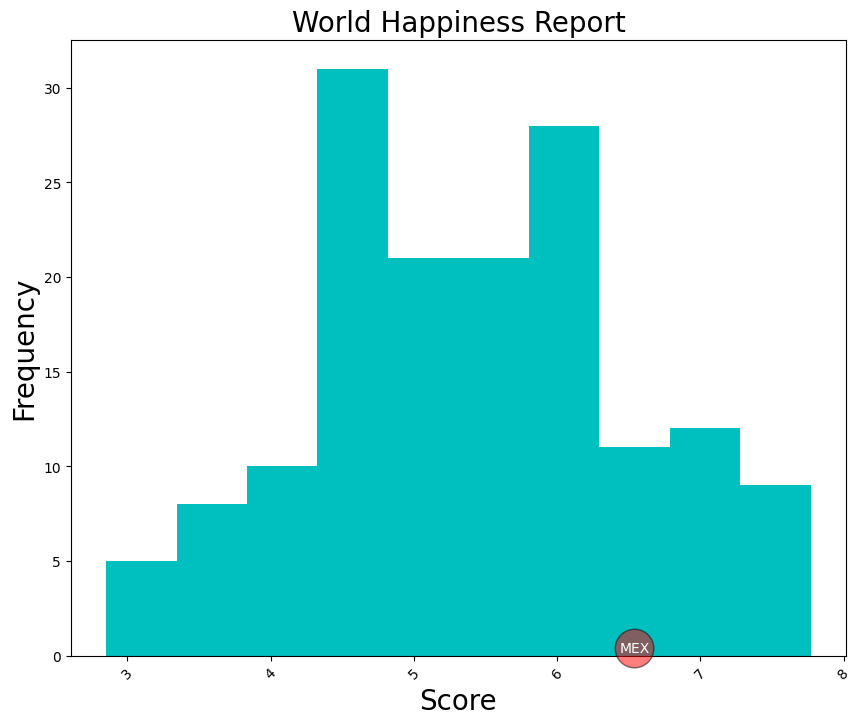

In [235]:
fig1=happiness['Score'].plot.hist(rot=45,figsize=(10,8),legend=False, color='c')
plt.title('World Happiness Report',fontsize=20,horizontalalignment='center')
plt.xlabel('Score',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
mexico_score = happiness.loc['Mexico', 'Score']
for rect in fig1.patches:
    if abs(rect.get_x() + rect.get_width()/2 - mexico_score) < 0.1:  # Adjust 0.1 as needed based on bin width
        height = 0
        fontsize=20
        fig1.text(rect.get_x() + rect.get_width() / 2, height, 'MEX', color='w', ha='center', va='bottom', bbox = {'facecolor': 'r', 'alpha': 0.5,'boxstyle': "circle,pad=0.3", 'pad': 8})
        break
plt.show()



Factors
                                     
GDP per capita                  1.070
Social support                  1.323
Healthy life expectancy         0.861
Freedom to make life choices    0.433
Generosity                      0.074
Perceptions of corruption       0.073

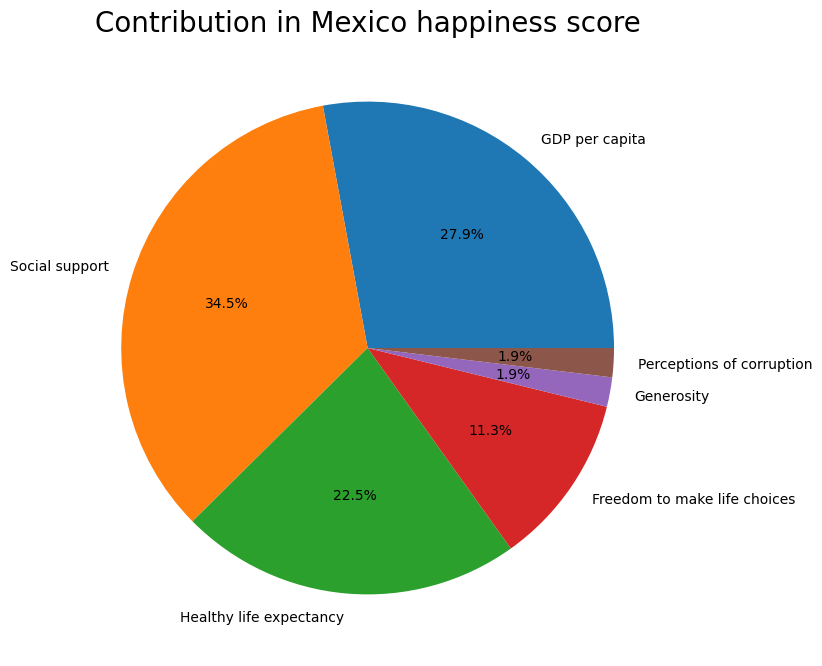

In [122]:
df1=mexico.drop(['Overall rank','Score'],axis=1)
df1=df1.T
df1.reset_index(inplace=True)
df1.columns=[' ','Factors']
df1.set_index(' ',inplace=True)
df1.plot.pie(y='Factors',labels=df1.index, autopct='%1.1f%%',figsize=(10,8),legend=False)
plt.title('Contribution in Mexico happiness score',fontsize=20,
horizontalalignment='center')
plt.xlabel('')
plt.ylabel('')
df1



Country or region             Finland  Denmark  Mexico  \
GDP per capita                  1.340    1.383   1.070   
Social support                  1.587    1.573   1.323   
Healthy life expectancy         0.986    0.996   0.861   
Freedom to make life choices    0.596    0.592   0.433   
Generosity                      0.153    0.252   0.074   
Perceptions of corruption       0.393    0.410   0.073   

Country or region             Central African Republic  South Sudan  
GDP per capita                                   0.026        0.306  
Social support                                   0.000        0.575  
Healthy life expectancy                          0.105        0.295  
Freedom to make life choices                     0.225        0.010  
Generosity                                       0.235        0.202  
Perceptions of corruption                        0.035        0.091

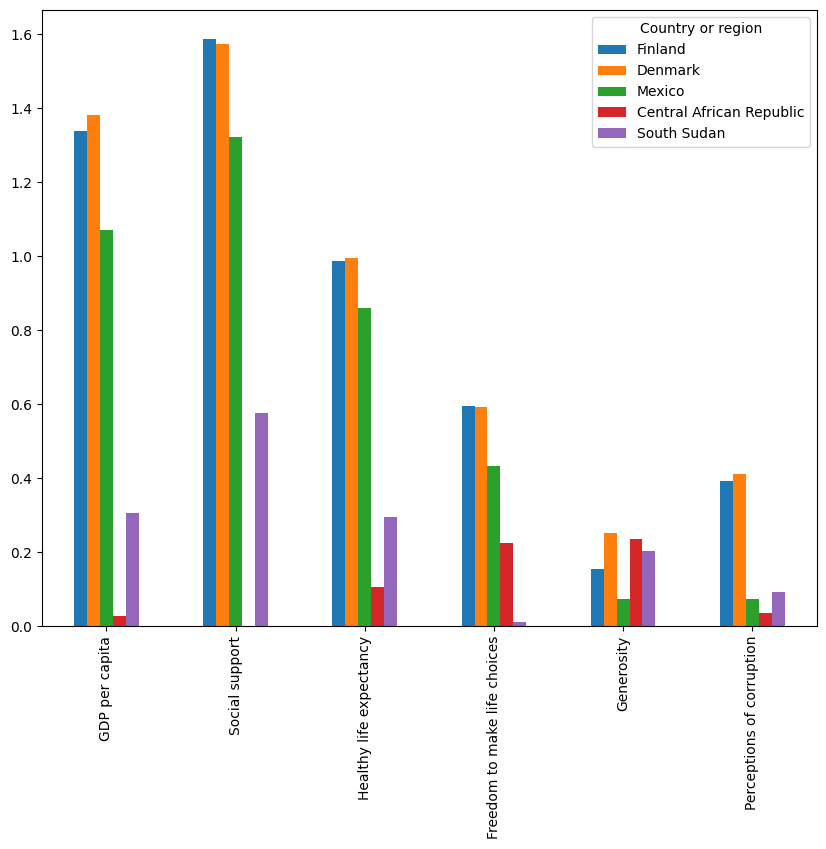

In [291]:
df2=happiness.loc[happiness['Overall rank']<=2]
df3=happiness.loc[happiness['Overall rank']>154]
df4=pd.concat([df2,df3,mexico])
#ordenar los valores de acuerdo a su ranking
df4=df4.sort_values('Overall rank')
#Eliminar el rango y el score, realizar la transpuesta
df5=df4.drop(['Overall rank','Score'],axis=1)
df5=df5.T
#graficar
df5.plot.bar(figsize=(10,8),legend=True)
df5


Score
Region                              
East Asia & Pacific         5.658769
Europe & Central Asia       6.104174
Latin America & Caribbean   6.007579
Middle East & North Africa  5.757429
North America               7.085000
South Asia                  4.526857
Sub-Saharan Africa          4.260000

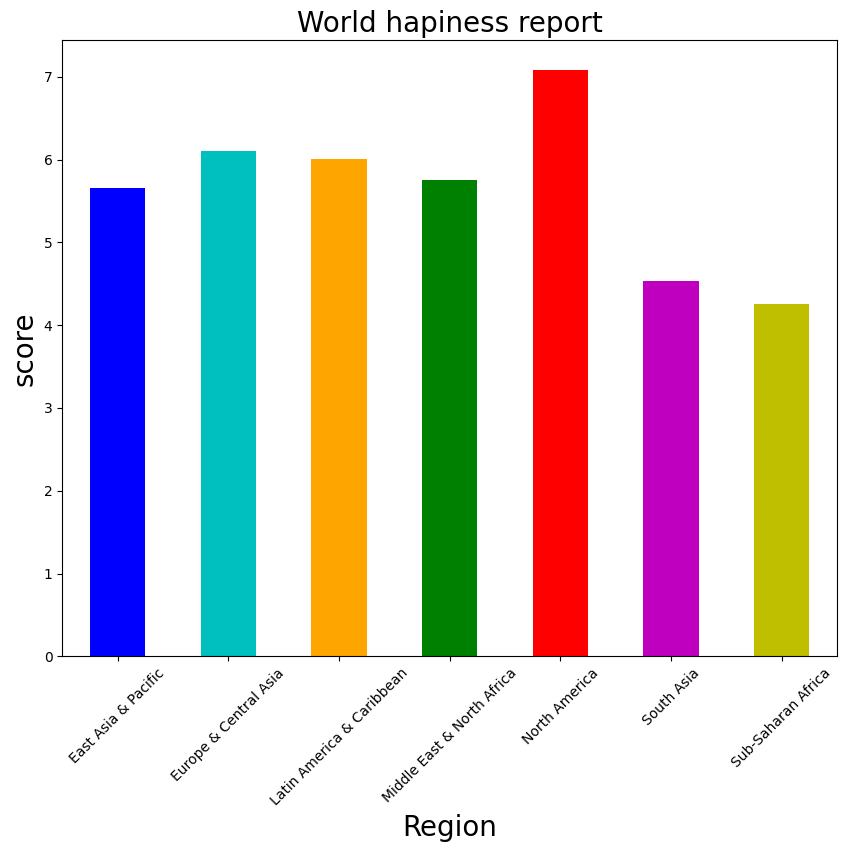

In [299]:
#leer archivo
metadata= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_C3_SC1_AbrahamDuarte./Metadata.csv')

#unir dataframes y agrupar por región la felicidad promedio
merged_df = pd.merge(left=metadata,right=happiness, left_on='TableName', right_on='Country or region')
merged_df=merged_df[['Region','Score']].groupby('Region').mean()

#graficar datos
merged_df['Score'].plot.bar(rot=45,figsize=(10,8),legend=False, color={'r','b','g','c','m','y','orange'})
plt.title('World hapiness report',fontsize=20,horizontalalignment='center')
plt.xlabel('Region',fontsize=20)
plt.ylabel('score',fontsize=20)
merged_df


Text(0.5, 1.0, 'World hapiness report')

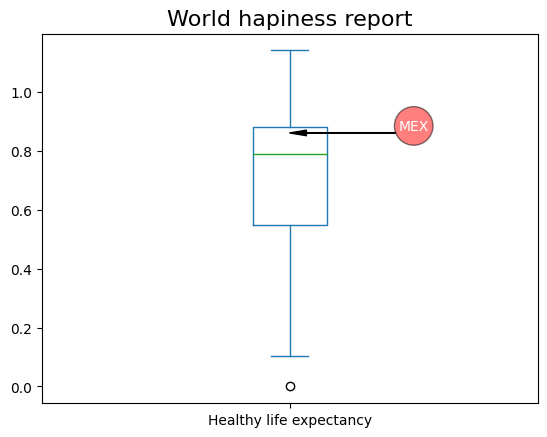

In [292]:
fig2=happiness['Healthy life expectancy'].plot.box()
mexico_score2 = happiness.loc['Mexico', 'Healthy life expectancy']
mexico_score2
fig2.annotate('MEX', color='w', ha='center', va='bottom', bbox = {'facecolor': 'r', 'alpha': 0.5,'boxstyle': "circle,pad=0.3", 'pad': 8},
    xy = (1, mexico_score2),
    xytext = (1.25, mexico_score2),
    arrowprops = dict(facecolor = 'black', width = 0.4, headwidth = 4))
plt.title('World hapiness report',fontsize=16,horizontalalignment='center')


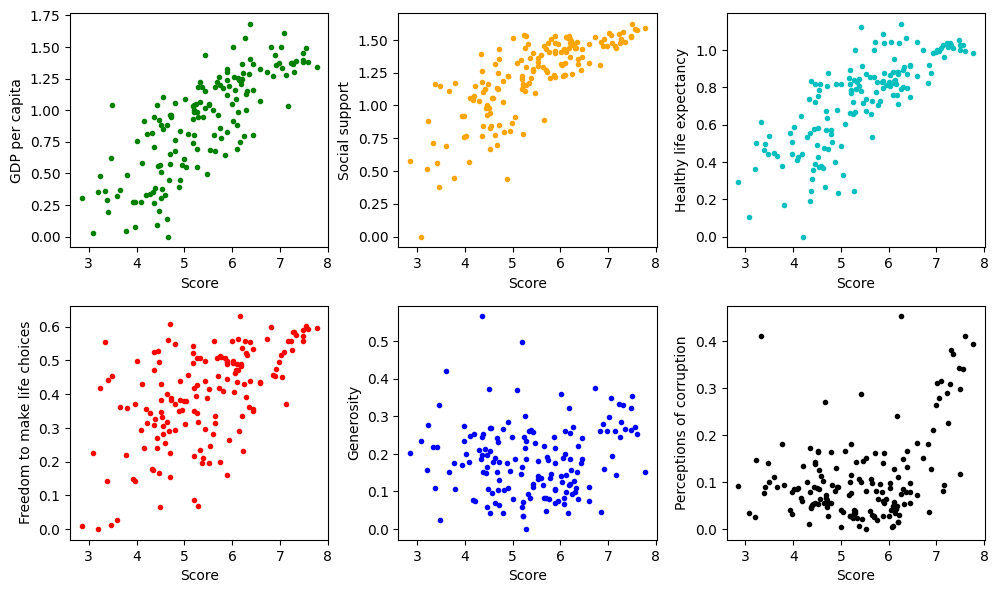

In [364]:
df6 = happiness[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Access individual subplots using axes[row, col]
axes[0, 0].scatter(x=df6['Score'],y=df6['GDP per capita'],color='g', marker='.')
axes[0, 0].set_ylabel('GDP per capita')
axes[0, 0].set_xlabel('Score')

axes[0, 1].scatter(x=df6['Score'],y=df6['Social support'],color='orange',marker='.')
axes[0, 1].set_ylabel('Social support')
axes[0, 1].set_xlabel('Score')

axes[0, 2].scatter(x=df6['Score'],y=df6['Healthy life expectancy'],color='c',marker='.')
axes[0, 2].set_ylabel('Healthy life expectancy')
axes[0, 2].set_xlabel('Score')

axes[1, 0].scatter(x=df6['Score'],y=df6['Freedom to make life choices'],color='r', marker='.')
axes[1, 0].set_ylabel('Freedom to make life choices')
axes[1, 0].set_xlabel('Score')

axes[1, 1].scatter(x=df6['Score'],y=df6['Generosity'],color='b', marker='.')
axes[1, 1].set_ylabel('Generosity')
axes[1, 1].set_xlabel('Score')

axes[1, 2].scatter(x=df6['Score'],y=df6['Perceptions of corruption'],color='k', marker='.')
axes[1, 2].set_ylabel('Perceptions of corruption')
axes[1, 2].set_xlabel('Score')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'World hapiness report-HeatMap')

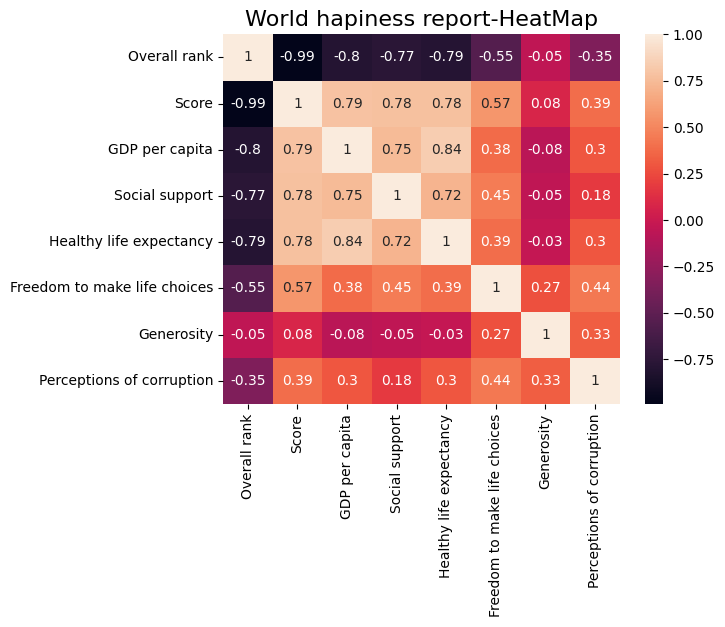

In [369]:
sns.heatmap(round(happiness.corr(),2),annot=True)
plt.title('World hapiness report-HeatMap',fontsize=16,horizontalalignment='center')